# Singapore  Resale Flat Prices Predicting

**Problem Statement:**

> Developed a machine learning model and deployed it as a user-friendly web application that predicts the resale prices of flats in Singapore.

> This predictive model is based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resale value of a flat.

**Approach:**

* Data Wrangling
* EDA
* Model Building
* Model Deployment









In [2]:
# Importing necessary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting up the formatting parameters
pd.set_option('display.max_columns',500) # To display max columns
pd.set_option('display.max_row',15000) # To display max rows
pd.options.display.float_format = "{:,.2f}".format #format floating-point number

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Wrangling

In [85]:
# Loading the data
df_raw = pd.read_csv('/content/drive/MyDrive/GUVI Data Science/Capstone Project/Singapore/singapore_house_resale_price.csv')

## Understaning the datas

In [86]:
df_raw.head()

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0           44.00        Improved                 1979  61 years 04 months   
1           67.00  New Generation                 1978  60 years 07 months   
2           67.00  New Generation                 1980  62 years 05 months   
3           68.00  New Generation                 1980   62 years 01 month   
4           67.00  New Generation                 1980  62 years 05 months   

   resale_price  
0    232,000.00  
1    250,000.00  
2    262,000.00  
3    265,000.00  
4    265,000.00

**Features**
* 'month'
* 'town'
* 'flat_type'
* 'block'
* 'street_name'
* 'storey_range'
* 'floor_area_sqm'
* 'flat_model'
* 'lease_commence_date'
* 'remaining_lease'

**Target/Dependent variables**
* 'resale_price'

In [87]:
df_raw.shape

(165041, 11)

In [88]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165041 entries, 0 to 165040
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                165041 non-null  object 
 1   town                 165041 non-null  object 
 2   flat_type            165041 non-null  object 
 3   block                165041 non-null  object 
 4   street_name          165041 non-null  object 
 5   storey_range         165041 non-null  object 
 6   floor_area_sqm       165041 non-null  float64
 7   flat_model           165041 non-null  object 
 8   lease_commence_date  165041 non-null  int64  
 9   remaining_lease      165041 non-null  object 
 10  resale_price         165041 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.9+ MB


In [89]:
df_raw.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [90]:
df_raw.nunique()

month                    82
town                     26
flat_type                 7
block                  2686
street_name             565
storey_range             17
floor_area_sqm          170
flat_model               21
lease_commence_date      56
remaining_lease         668
resale_price           3629
dtype: int64

# **Data Cleaning**

In [91]:
house = df_raw.copy()

In [92]:
#Checking for duplicate records
print('There are ',house.duplicated().sum(),' duplicate records, are droped.')
house = house.drop_duplicates()
print('Dataset with ', house.shape[0] ,'were used for analysis')

There are  278  duplicate records, are droped.
Dataset with  164763 were used for analysis


## Cleaning feature - 'month'

In [93]:
house['month'].value_counts()

2021-08    2735
2021-07    2655
2022-09    2576
2021-11    2566
2023-01    2552
2018-07    2536
2021-09    2510
2021-10    2495
2021-01    2490
2020-09    2481
2020-12    2480
2023-08    2470
2020-07    2453
2021-03    2442
2022-01    2440
2020-06    2438
2020-10    2426
2020-08    2423
2021-12    2419
2022-07    2358
2021-04    2330
2020-11    2320
2022-08    2309
2021-06    2300
2023-03    2274
2022-03    2262
2022-04    2261
2023-05    2246
2022-12    2232
2019-10    2204
2023-10    2197
2023-04    2175
2021-02    2160
2022-05    2152
2022-06    2134
2022-11    2128
2019-07    2111
2019-05    2067
2018-08    2065
2023-07    2052
2018-10    1992
2018-09    1985
2023-09    1980
2018-06    1975
2017-11    1966
2017-05    1961
2022-10    1956
2021-05    1954
2017-08    1941
2020-03    1935
2019-04    1915
2020-01    1910
2019-11    1910
2019-08    1900
2022-02    1894
2017-03    1889
2019-06    1884
2018-03    1880
2018-11    1865
2023-06    1852
2019-12    1847
2023-02    1837
2018-04 

In [94]:
(house['month'].value_counts()).mean()

2009.3048780487804

**Interference :**
* Every month the data was updated with 2009 records on average.
* Dataset with 1,64,763 were used for analysis.


In [95]:
#converting feature to datetime format
house['month'] = pd.to_datetime(house['month'])

In [96]:
house['month'][0]

Timestamp('2017-01-01 00:00:00')

## Cleaning feature
* 'flat_type'
* 'flat_model'

In [97]:
house['flat_type'].value_counts()

4 ROOM              69307
5 ROOM              41284
3 ROOM              38859
EXECUTIVE           12432
2 ROOM               2746
MULTI-GENERATION       73
1 ROOM                 62
Name: flat_type, dtype: int64

In [98]:
house['flat_model'].value_counts()

Model A                   56524
Improved                  40750
New Generation            20561
Premium Apartment         18809
Simplified                 6398
Apartment                  6233
Maisonette                 4728
Standard                   4588
DBSS                       2859
Model A2                   1894
Adjoined flat               298
Model A-Maisonette          297
Type S1                     288
Type S2                     155
Premium Apartment Loft       97
Terrace                      91
Multi Generation             73
2-room                       60
Improved-Maisonette          25
3Gen                         21
Premium Maisonette           14
Name: flat_model, dtype: int64

## Cleaning feature 'storey_range'

In [99]:
house['storey_range'].value_counts()

04 TO 06    37840
07 TO 09    34565
10 TO 12    30838
01 TO 03    29047
13 TO 15    15750
16 TO 18     7431
19 TO 21     3164
22 TO 24     2285
25 TO 27     1373
28 TO 30      890
31 TO 33      471
34 TO 36      432
37 TO 39      383
40 TO 42      186
43 TO 45       55
46 TO 48       38
49 TO 51       15
Name: storey_range, dtype: int64

**Interference :**
* 'storey_range' can be segmented to


> Low_Rise_Building : '01 to 06'

> Mid_Rise_Building : '07 tO 15'

> High_Rise_Building : greaterthan 15



In [100]:
house = house.reset_index(drop=True)

In [101]:
# Segmenting storey_range
for i in range(0,len(house['storey_range']),1):
    if (house['storey_range'][i] == '01 TO 03') or (house['storey_range'][i] == '04 TO 06'):
        house['storey_range'][i] = 'Low_Rise_Building'
    elif house['storey_range'][i] in ('07 TO 09','10 TO 12','13 TO 15'):
        house['storey_range'][i] = 'Mid_Rise_Building'
    else:
        house['storey_range'][i] = 'High_Rise_Building'

house['storey_range'].value_counts()

Mid_Rise_Building     81153
Low_Rise_Building     66887
High_Rise_Building    16723
Name: storey_range, dtype: int64

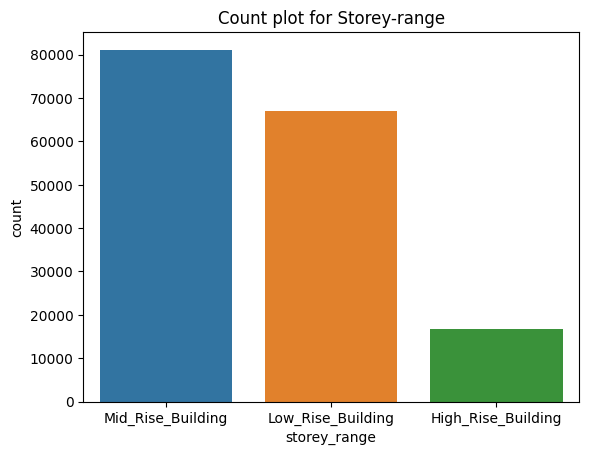

In [102]:
# Count plot for storey range
sns.countplot(data=house,x='storey_range')
plt.title('Count plot for Storey-range')
plt.show()

In [103]:
house.describe().T

count       mean        std        min        25%  \
floor_area_sqm      164,763.00      97.34      24.03      31.00      82.00   
lease_commence_date 164,763.00   1,995.80      13.90   1,966.00   1,985.00   
resale_price        164,763.00 488,792.76 169,194.71 140,000.00 365,000.00   

                           50%        75%          max  
floor_area_sqm           93.00     112.00       249.00  
lease_commence_date   1,996.00   2,009.00     2,022.00  
resale_price        458,800.00 580,000.00 1,500,000.00

In [104]:
#house['lease_commence_date'].value_counts()
house['lease_commence_date'].unique()

array([1979, 1978, 1980, 1981, 1976, 1977, 2011, 2012, 1996, 1988, 1985,
       1986, 1974, 1984, 1983, 1987, 1982, 2000, 2001, 2005, 1989, 2010,
       1972, 1993, 1973, 1992, 1990, 1998, 2004, 1997, 1971, 1975, 1970,
       1969, 2013, 2008, 1999, 2003, 2002, 1995, 2006, 1967, 1968, 2007,
       1991, 1966, 2009, 1994, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020])

#Exploratory Data Analysis

## Feature Extraction

### New Feature  - Building Age

> Age of the flat/building from the lease commence date.

> The lease commence date is the lease starting date of the building.


In [105]:
# inserting new column
house.insert(11,'building_Age','')

In [106]:
house = house.reset_index(drop=True)

In [107]:
# Calculating the Age of the building
for i in range(0,len(house['lease_commence_date']),1):
    house['building_Age'][i]= (2023 - house['lease_commence_date'][i])

house['building_Age'].value_counts()

38    9711
8     9521
39    7178
35    6110
7     5942
22    5382
26    4989
36    4952
10    4910
20    4744
6     4713
25    4591
24    4520
45    4515
5     4446
37    4421
23    4260
27    4042
34    4023
11    3693
21    3662
30    3650
44    3586
43    3525
9     3502
31    2887
19    2753
28    2682
47    2634
40    2544
42    2485
46    2226
48    2065
12    1927
49    1687
41    1609
18    1454
53    1373
17    1264
33    1130
4     1081
15    1037
50     929
29     928
14     907
56     804
54     785
51     732
13     720
52     714
16     442
55     192
32     165
57      15
3        3
1        1
Name: building_Age, dtype: int64

In [108]:
house.describe().T[['min','max']]

min          max
floor_area_sqm           31.00       249.00
lease_commence_date   1,966.00     2,022.00
resale_price        140,000.00 1,500,000.00

In [109]:
house['building_Age'].dtype

dtype('O')

In [110]:
house['building_Age'] = house['building_Age'].astype(int)
house['building_Age'].dtype

dtype('int64')

In [111]:
age = house['building_Age'].unique().tolist()
age = sorted(age)
print(age)

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


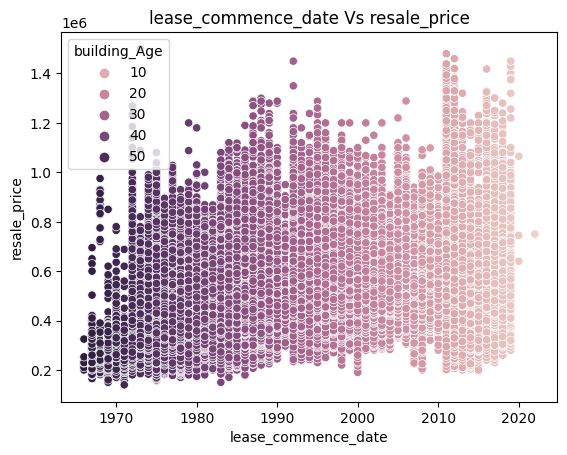

In [112]:
# Scatter Plot
plt.title('lease_commence_date Vs resale_price')
sns.scatterplot(data=house,x='lease_commence_date',y='resale_price',hue='building_Age')
plt.show()

In [113]:
house.groupby(['town','street_name','flat_model']).count()

month  flat_type  \
town            street_name          flat_model                                 
ANG MO KIO      ANG MO KIO AVE 1     Adjoined flat               3          3   
                                     Improved                   41         41   
                                     Model A                   191        191   
                                     New Generation            432        432   
                                     Standard                   30         30   
                ANG MO KIO AVE 10    Adjoined flat              22         22   
                                     Improved                  220        220   
                                     New Generation           1343       1343   
                ANG MO KIO AVE 2     Model A                    20         20   
                ANG MO KIO AVE 3     Adjoined flat              13         13   
                                     Improved                  100        100   
                                     Model A                    17         17   
                                     New Generation           1267       1267   
                                     Standard                   29         29   
                ANG MO KIO AVE 4     Adjoined flat               3          3   
                                     Apartment                  34         34   
                                     Improved                  110        110   
                                     Maisonette                  6          6   
                                     Model A                    48         48   
                                     New Generation            612        612   
                ANG MO KIO AVE 5     Adjoined flat              11         11   
                                     Improved                   91         91   
                                     New Generation            636        636   
                ANG MO KIO AVE 6     Adjoined flat               2          2   
                                     Improved                   69         69   
                                     Model A                    31         31   
                                     New Generation            210        210   
                ANG MO KIO AVE 8     Adjoined flat              11         11   
                                     Improved                   37         37   
                                     New Generation            188        188   
                ANG MO KIO AVE 9     Adjoined flat               3          3   
                                     Improved                   27         27   
                                     Model A                     3          3   
                                     New Generation             51         51   
                ANG MO KIO ST 11     Apartment                   8          8   
                                     Improved                   13         13   
                                     Maisonette                  4          4   
                                     Model A                     1          1   
                ANG MO KIO ST 21     Improved                   22         22   
                                     Model A                    51         51   
                ANG MO KIO ST 31     Improved                   57         57   
                                     Model A                    60         60   
                ANG MO KIO ST 32     Improved                   59         59   
                                     Model A                    62         62   
                ANG MO KIO ST 44     Improved                   38         38   
                                     Model A                    69         69   
                ANG MO KIO ST 51     Model A                    71         71   
                ANG MO KIO ST 52     DBSS                      248        248   
           

In [114]:
house.groupby(['town','street_name'])['resale_price'].count()

town             street_name         
ANG MO KIO       ANG MO KIO AVE 1         697
                 ANG MO KIO AVE 10       1585
                 ANG MO KIO AVE 2          20
                 ANG MO KIO AVE 3        1426
                 ANG MO KIO AVE 4         813
                 ANG MO KIO AVE 5         738
                 ANG MO KIO AVE 6         312
                 ANG MO KIO AVE 8         236
                 ANG MO KIO AVE 9          84
                 ANG MO KIO ST 11          26
                 ANG MO KIO ST 21          73
                 ANG MO KIO ST 31         117
                 ANG MO KIO ST 32         121
                 ANG MO KIO ST 44         107
                 ANG MO KIO ST 51          71
                 ANG MO KIO ST 52         366
                 ANG MO KIO ST 61          36
BEDOK            BEDOK CTRL               166
                 BEDOK NTH AVE 1          261
                 BEDOK NTH AVE 2          275
                 BEDOK NTH AVE 3          

In [115]:
house.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                object
resale_price                  float64
building_Age                    int64
dtype: object

In [116]:
house['block'].value_counts()

2       511
8       490
1       467
9       455
101     443
7       419
3       418
108     414
4       408
114     405
110     404
22      396
109     395
107     392
115     390
112     388
113     388
111     387
12      383
6       369
11      367
121     364
20      364
5       360
102     358
13      352
32      347
103     345
23      343
105     337
34      335
116     331
17      330
21      329
28      329
125     328
130     326
122     322
106     309
50      309
120     307
124     304
128     301
119     291
30      285
117     284
18      282
19      282
129     276
55      274
10      263
104     263
54      262
126     260
123     259
57      255
15      254
141     251
145     250
210     248
146     245
421     245
135     245
52      245
142     244
425     243
118     240
51      240
416     239
33      238
131     237
53      235
204     234
411     234
27      230
148     230
16      230
43      229
211     229
420     229
86      228
406     227
157     227
134 

In [117]:
house.head()

month        town flat_type block        street_name  \
0 2017-01-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10   
1 2017-01-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4   
2 2017-01-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5   
3 2017-01-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10   
4 2017-01-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5   

        storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0  Mid_Rise_Building           44.00        Improved                 1979   
1  Low_Rise_Building           67.00  New Generation                 1978   
2  Low_Rise_Building           67.00  New Generation                 1980   
3  Low_Rise_Building           68.00  New Generation                 1980   
4  Low_Rise_Building           67.00  New Generation                 1980   

      remaining_lease  resale_price  building_Age  
0  61 years 04 months    232,000.00            44  
1  60 years 07 months    250,000.00            45  
2  62 years 05 months    262,000.00            43  
3   62 years 01 month    265,000.00            43  
4  62 years 05 months    265,000.00            43

In [118]:
# Changing the column names
house = house.rename(columns={'building_Age':'flat_age_months'})

In [119]:
# Converting Years to months
for i in range(0,len(house['flat_age_months']),1):
    house['flat_age_months'][i] = (house['flat_age_months'][i]*12)
print(house['flat_age_months'][0])

528


In [120]:
for i in range(0,len(house['remaining_lease']),1):
    year = (house['remaining_lease'][i][:2])
    month = (house['remaining_lease'][i][9:11])
    if month != '':
        house['remaining_lease'][i] = (int(month) + (int(year)*12))
    else:
        year = (house['remaining_lease'][i][:2])
        house['remaining_lease'][i] = (int(year)*12)

print(house['remaining_lease'][0])

736


In [121]:
house['remaining_lease'] = house['remaining_lease'].astype(int)

In [122]:
# Drop month column
house.drop(['month','lease_commence_date','block','street_name'],axis=1,inplace=True)

In [123]:
house.head(2)

town flat_type       storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO    2 ROOM  Mid_Rise_Building           44.00        Improved   
1  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   

   remaining_lease  resale_price  flat_age_months  
0              736    232,000.00              528  
1              727    250,000.00              540

In [124]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164763 entries, 0 to 164762
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             164763 non-null  object 
 1   flat_type        164763 non-null  object 
 2   storey_range     164763 non-null  object 
 3   floor_area_sqm   164763 non-null  float64
 4   flat_model       164763 non-null  object 
 5   remaining_lease  164763 non-null  int64  
 6   resale_price     164763 non-null  float64
 7   flat_age_months  164763 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 10.1+ MB


### New Feature 'lease_exp'
* from 'remaining_lease' and 'flat_age_months'

In [125]:
# Extracting a new feature lease expiry period in months
house.insert(8,'lease_exp','')

for i in range(0,(len(house['remaining_lease'])),1):
    house['lease_exp'][i] = ((house['remaining_lease'][i]) - (house['flat_age_months'][i]))

In [126]:
house['lease_exp'] = house['lease_exp'].astype(int)

In [127]:
house.drop(['remaining_lease'],axis=1,inplace=True)

In [128]:
house.head()

town flat_type       storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO    2 ROOM  Mid_Rise_Building           44.00        Improved   
1  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   
2  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   
3  ANG MO KIO    3 ROOM  Low_Rise_Building           68.00  New Generation   
4  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   

   resale_price  flat_age_months  lease_exp  
0    232,000.00              528        208  
1    250,000.00              540        187  
2    262,000.00              516        233  
3    265,000.00              516        229  
4    265,000.00              516        233

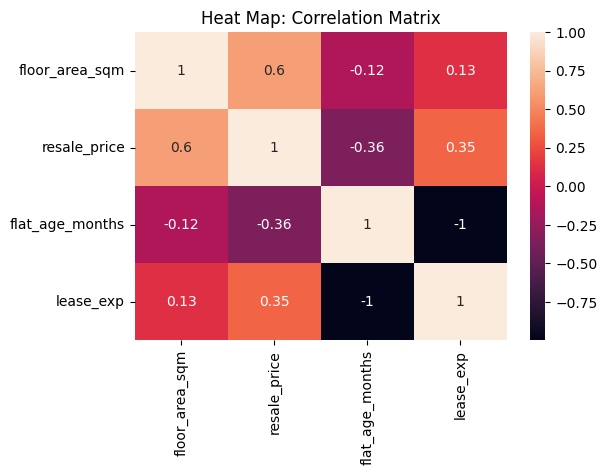

In [129]:
# Calculate the correlation matrix for numeric columns
corr = house.corr(numeric_only=True)

# Plotting correlation heat map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)

plt.title('Heat Map: Correlation Matrix')

plt.show()

**Interference :**
* Flat_age and resale price are positively correlated.

## Frequency Distribution Analysis and visualization

Finding the building population in town

In [130]:
# Two-way Frequency Table
pd.crosstab(index=house['town'],columns=house['storey_range'],margins=True,
            normalize='columns')

storey_range     High_Rise_Building  Low_Rise_Building  Mid_Rise_Building  All
town                                                                          
ANG MO KIO                     0.04               0.04               0.04 0.04
BEDOK                          0.02               0.06               0.06 0.05
BISHAN                         0.02               0.02               0.02 0.02
BUKIT BATOK                    0.04               0.04               0.03 0.04
BUKIT MERAH                    0.10               0.03               0.03 0.04
BUKIT PANJANG                  0.06               0.03               0.04 0.04
BUKIT TIMAH                    0.00               0.00               0.00 0.00
CENTRAL AREA                   0.03               0.00               0.01 0.01
CHOA CHU KANG                  0.03               0.05               0.05 0.05
CLEMENTI                       0.04               0.02               0.02 0.02
GEYLANG                        0.02               0.03               0.02 0.02
HOUGANG                        0.02               0.05               0.05 0.05
JURONG EAST                    0.03               0.02               0.02 0.02
JURONG WEST                    0.04               0.07               0.07 0.07
KALLANG/WHAMPOA                0.06               0.03               0.03 0.03
MARINE PARADE                  0.01               0.01               0.01 0.01
PASIR RIS                      0.00               0.04               0.03 0.03
PUNGGOL                        0.08               0.06               0.09 0.07
QUEENSTOWN                     0.10               0.02               0.02 0.03
SEMBAWANG                      0.01               0.02               0.03 0.03
SENGKANG                       0.14               0.06               0.09 0.08
SERANGOON                      0.00               0.02               0.02 0.02
TAMPINES                       0.01               0.08               0.06 0.07
TOA PAYOH                      0.06               0.03               0.03 0.03
WOODLANDS                      0.02               0.08               0.07 0.07
YISHUN                         0.00               0.08               0.07 0.07

**Interference :**

* SENGKANG town has the maximium number of flats.
* BUKIT TIMAH town has the minimum number of flats.

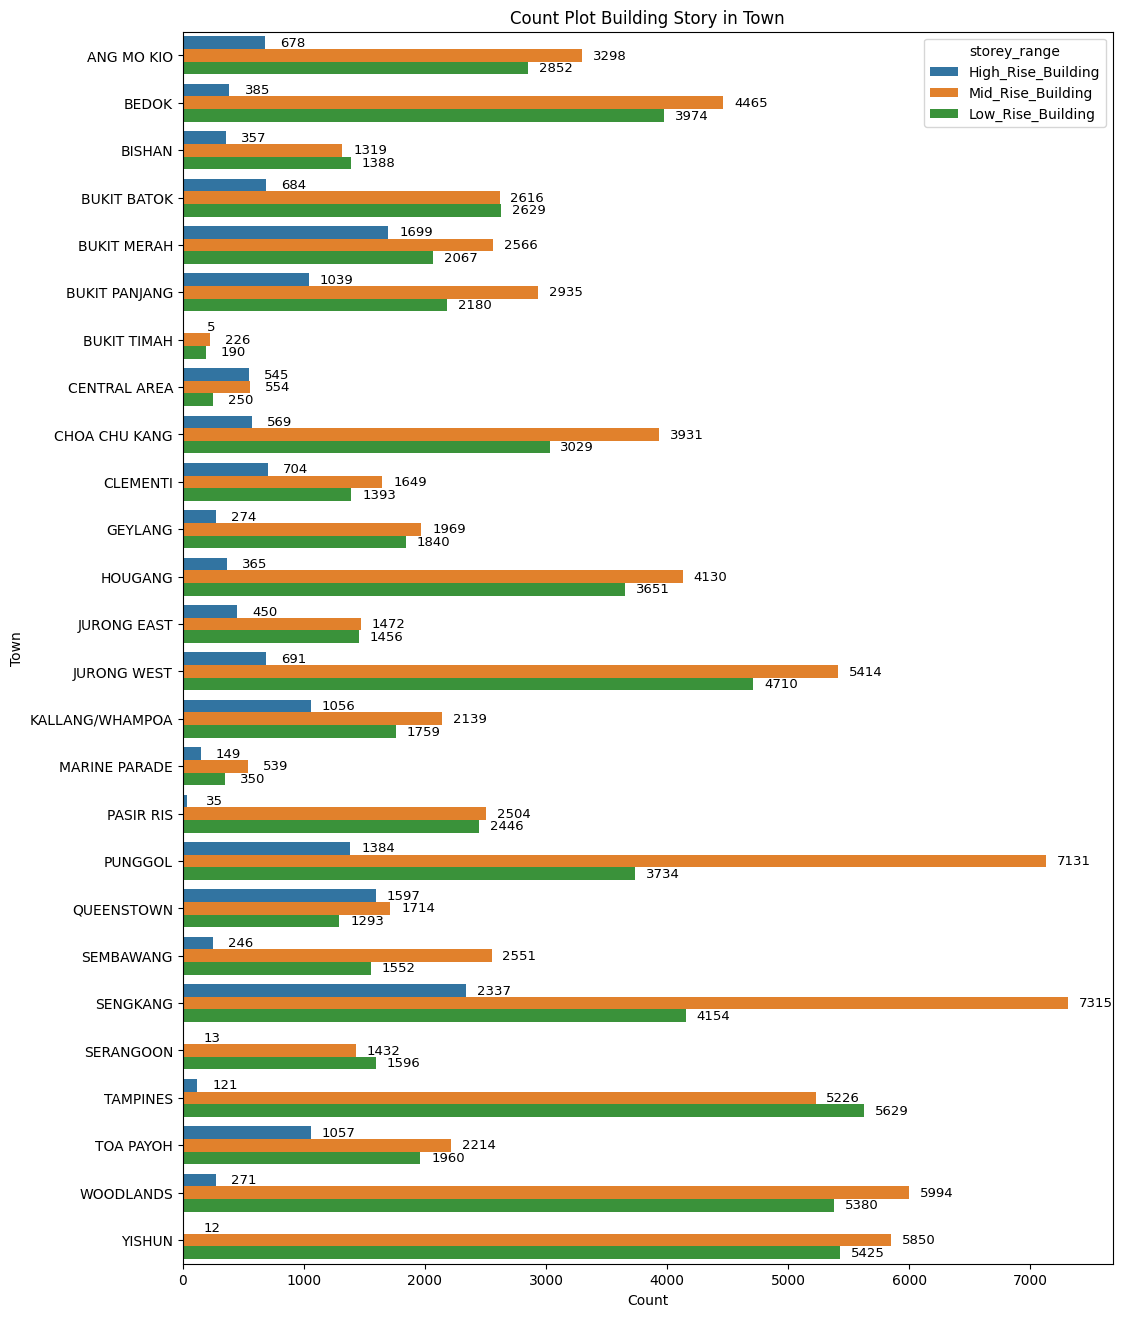

In [131]:
plt.figure(figsize=(12,16))
plots = sns.countplot(y='town', data=house,hue='storey_range', hue_order=['High_Rise_Building','Mid_Rise_Building','Low_Rise_Building'])
plt.title('Count Plot Building Story in Town')
# Annotating the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height()/ 2),
                   ha='center', va='center',
                   size=9.5, xytext=(20, 0), textcoords='offset points')

plt.xlabel('Count')
plt.ylabel('Town')
plt.show()

In [132]:
# Two_way Marginal Probability Table
pd.crosstab(index=house['storey_range'],columns=house['flat_type'],
            margins=True, dropna=True, normalize=True)

flat_type           1 ROOM  2 ROOM  3 ROOM  4 ROOM  5 ROOM  EXECUTIVE  \
storey_range                                                            
High_Rise_Building    0.00    0.00    0.01    0.05    0.03       0.00   
Low_Rise_Building     0.00    0.01    0.11    0.16    0.09       0.04   
Mid_Rise_Building     0.00    0.01    0.11    0.21    0.13       0.04   
All                   0.00    0.02    0.24    0.42    0.25       0.08   

flat_type           MULTI-GENERATION  All  
storey_range                               
High_Rise_Building              0.00 0.10  
Low_Rise_Building               0.00 0.41  
Mid_Rise_Building               0.00 0.49  
All                             0.00 1.00

**Interference :**

* In the 'flat type' 4 ROOM flats constitute 42% of the total, while 5 ROOM flats constitute 25% among the storey_range.

* In the 'Mid_Rise_Building' flats with 4 ROOM constitute 21% and Low_Rise_Building constitute 16%.

* Among the flat type, Mid_Rise_Building constitutes to 49%, while Low_Rise_building constitutes to 41% and there is 10% of High_Rise_buildings.

In [133]:
# Two_way Marginal Probability Table
pd.crosstab(index=house['flat_model'],columns=house['storey_range'],
            margins=True, dropna=True, normalize=True)

storey_range            High_Rise_Building  Low_Rise_Building  \
flat_model                                                      
2-room                                0.00               0.00   
3Gen                                  0.00               0.00   
Adjoined flat                         0.00               0.00   
Apartment                             0.00               0.02   
DBSS                                  0.01               0.00   
Improved                              0.03               0.09   
Improved-Maisonette                   0.00               0.00   
Maisonette                            0.00               0.02   
Model A                               0.04               0.13   
Model A-Maisonette                    0.00               0.00   
Model A2                              0.00               0.00   
Multi Generation                      0.00               0.00   
New Generation                        0.00               0.06   
Premium Apartment                     0.02               0.04   
Premium Apartment Loft                0.00               0.00   
Premium Maisonette                    0.00               0.00   
Simplified                            0.00               0.02   
Standard                              0.00               0.01   
Terrace                               0.00               0.00   
Type S1                               0.00               0.00   
Type S2                               0.00               0.00   
All                                   0.10               0.41   

storey_range            Mid_Rise_Building  All  
flat_model                                      
2-room                               0.00 0.00  
3Gen                                 0.00 0.00  
Adjoined flat                        0.00 0.00  
Apartment                            0.02 0.04  
DBSS                                 0.01 0.02  
Improved                             0.13 0.25  
Improved-Maisonette                  0.00 0.00  
Maisonette                           0.01 0.03  
Model A                              0.17 0.34  
Model A-Maisonette                   0.00 0.00  
Model A2                             0.01 0.01  
Multi Generation                     0.00 0.00  
New Generation                       0.06 0.12  
Premium Apartment                    0.06 0.11  
Premium Apartment Loft               0.00 0.00  
Premium Maisonette                   0.00 0.00  
Simplified                           0.02 0.04  
Standard                             0.01 0.03  
Terrace                              0.00 0.00  
Type S1                              0.00 0.00  
Type S2                              0.00 0.00  
All                                  0.49 1.00

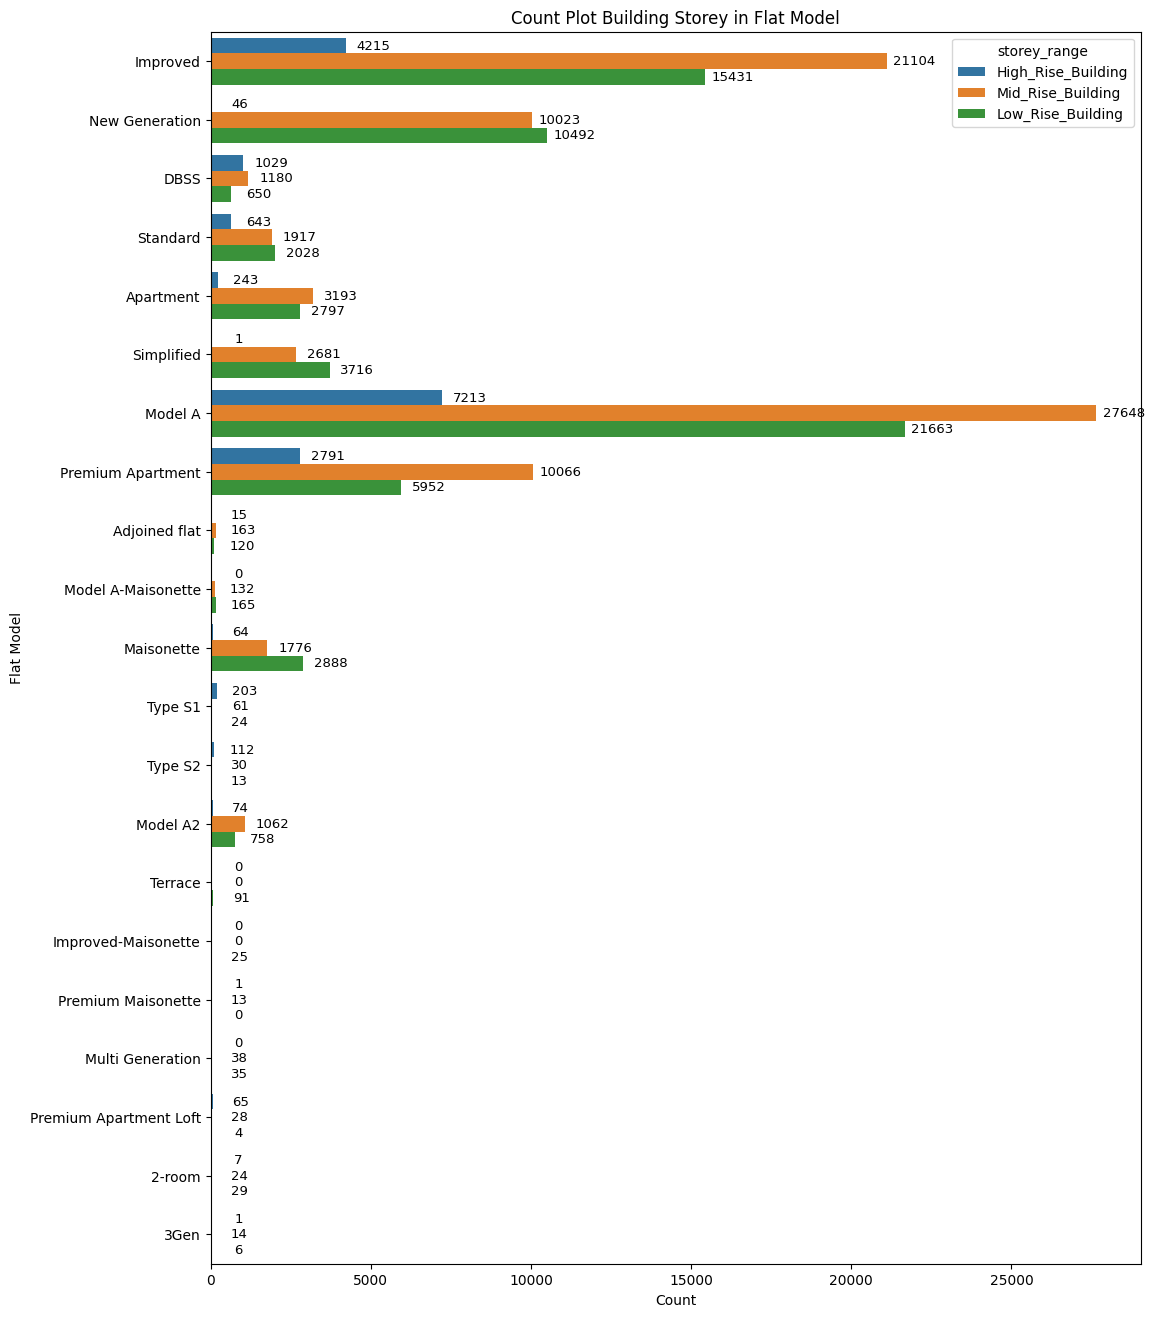

In [134]:
# Count Plot Building Storey in Flat Model
plt.figure(figsize=(12,16))
plots = sns.countplot(y='flat_model', data=house,hue='storey_range', hue_order=['High_Rise_Building','Mid_Rise_Building','Low_Rise_Building'])
plt.title('Count Plot Building Storey in Flat Model')
# Annotating the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height()/ 2),
                   ha='center', va='center',
                   size=9.5, xytext=(20, 0), textcoords='offset points')

plt.xlabel('Count')
plt.ylabel('Flat Model')
plt.show()

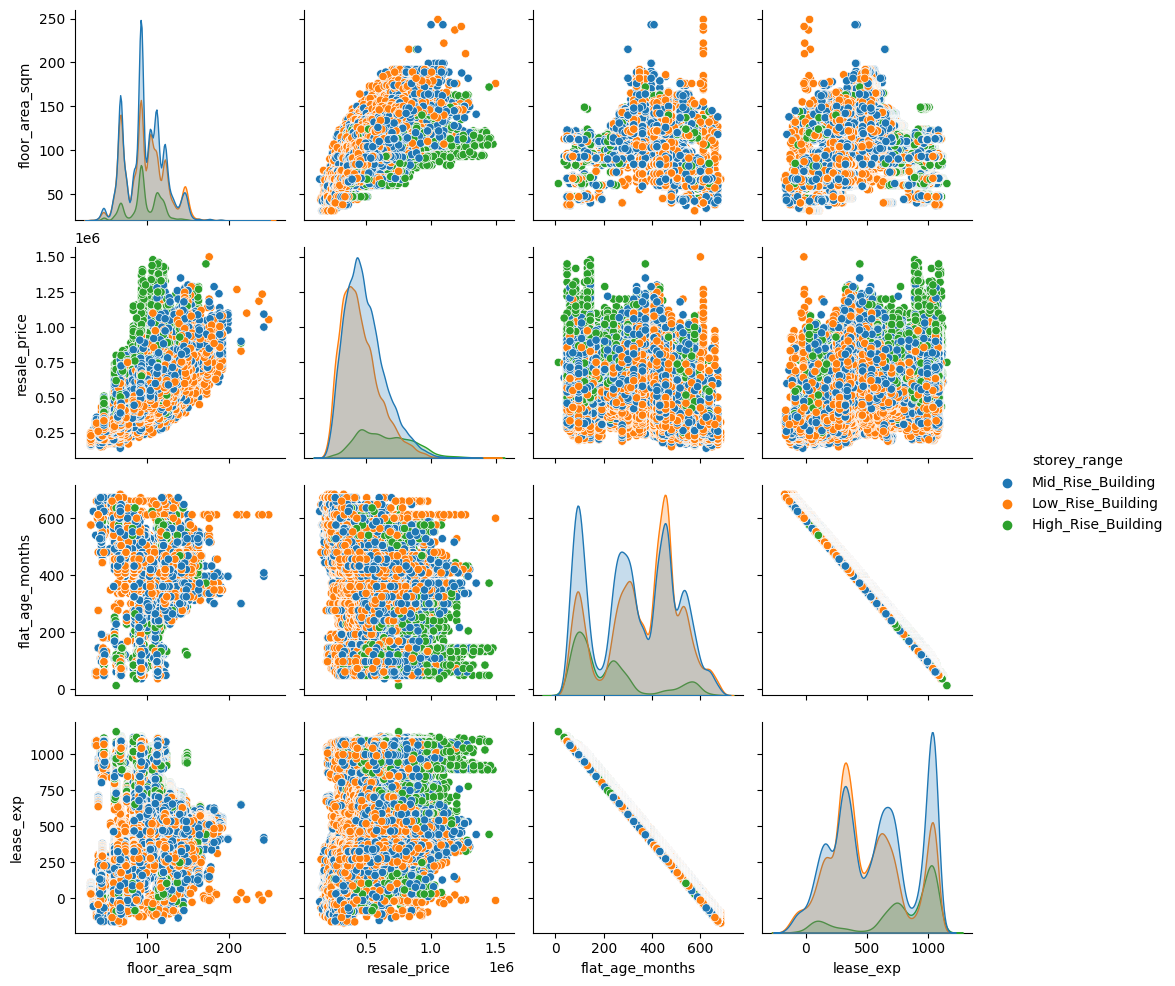

In [135]:
# Pair Plot
sns.pairplot(house, hue='storey_range')

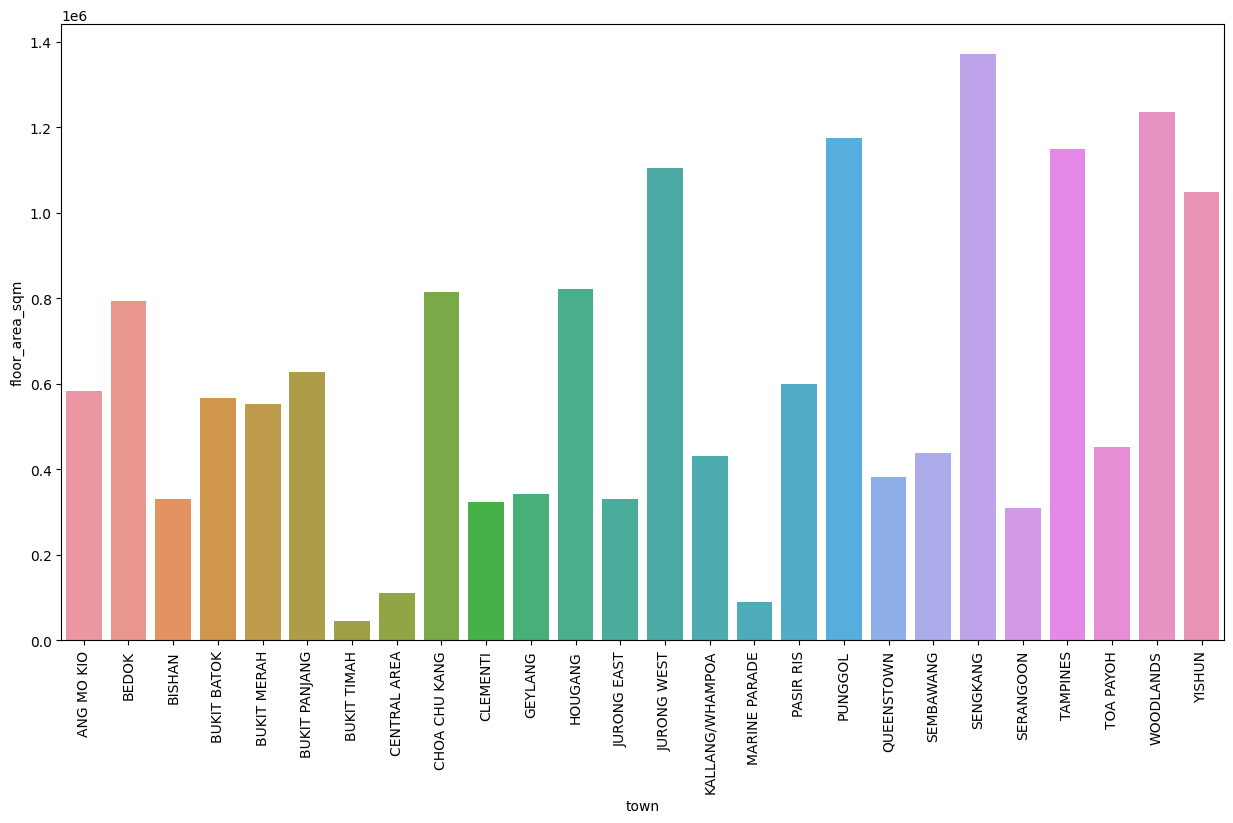

In [136]:
# Barplot to visualize the residential population
fig = plt.figure(figsize=(15,8))
sns.barplot(x='town',y='floor_area_sqm',data=house,estimator="sum", errorbar=None)
plt.xticks(rotation=90)
plt.show()

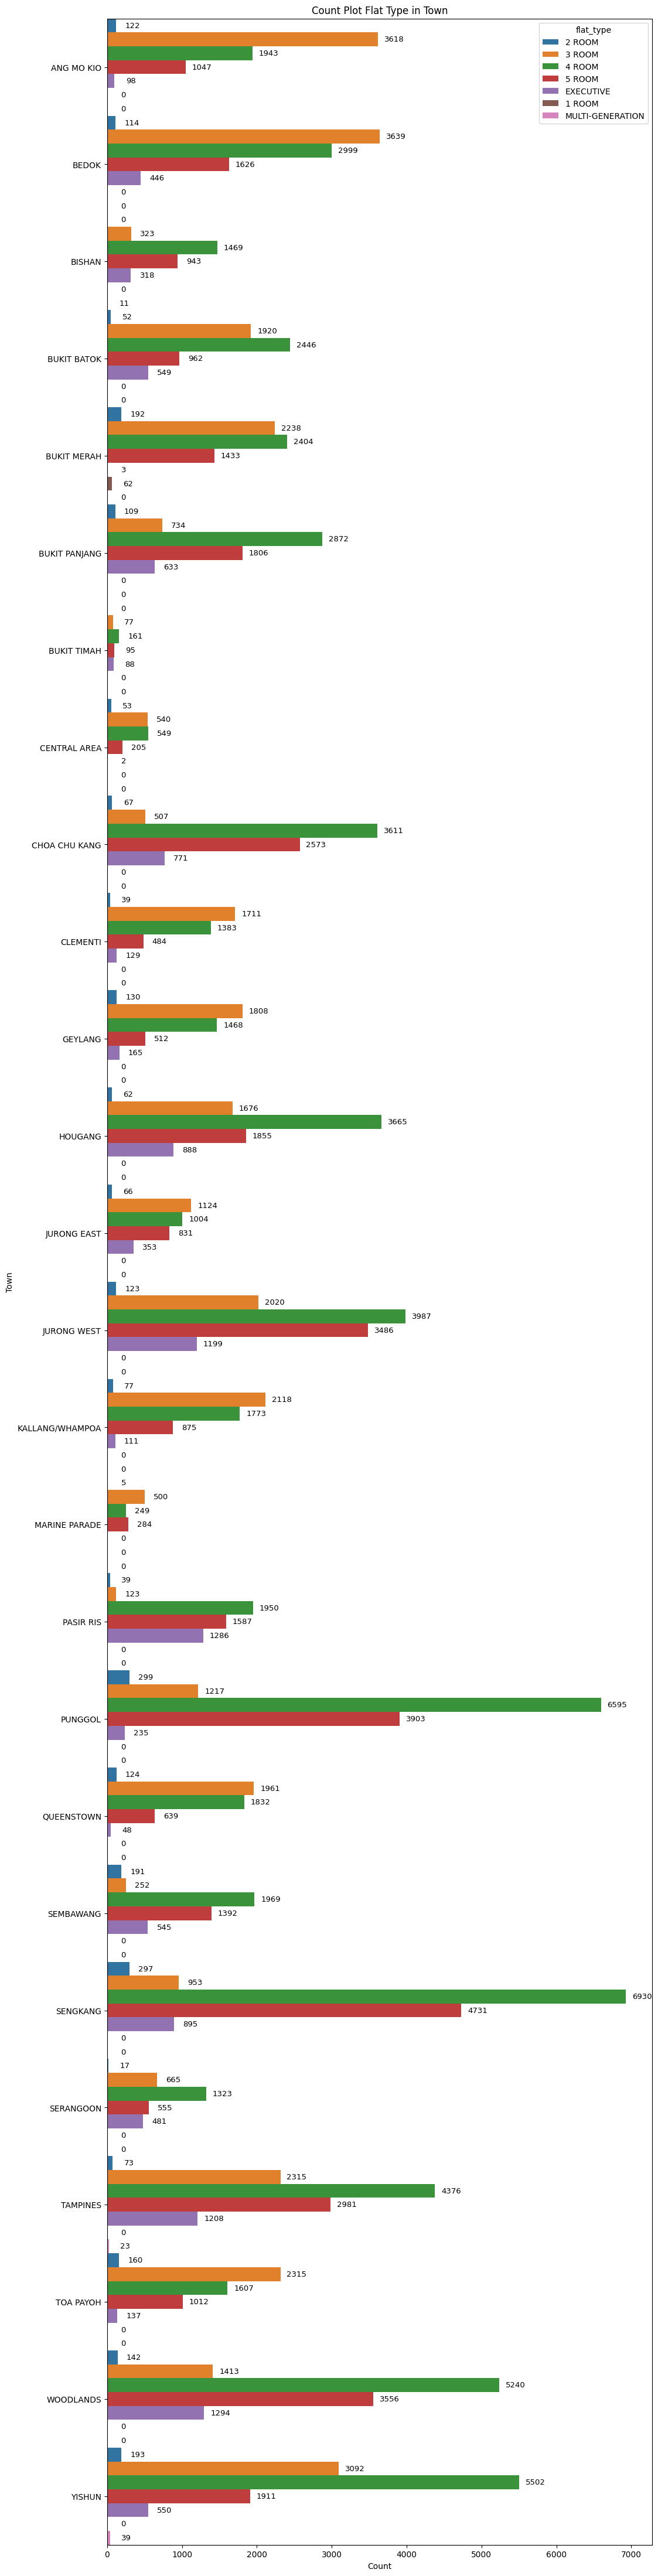

In [137]:
# Count Plot Flat Type in Town
plt.figure(figsize=(12,56))
plots = sns.countplot(y='town', data=house,hue='flat_type',
                      width=1)
plt.title('Count Plot Flat Type in Town')
# Annotating the bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(), bar.get_y() + bar.get_height()/ 2),
                   ha='center', va='center',
                   size=9.5, xytext=(20, 0), textcoords='offset points')

plt.xlabel('Count')
plt.ylabel('Town')
plt.show()

In [138]:
# Save the cleaned DataFrame 'house' to a CSV file named 'sing_house_price_cleaned.csv
house.to_csv('sing_house_price_cleaned.csv')

# ML Preprocessing

In [ ]:
house_ml = pd.read_csv('sing_house_price_cleaned.csv',index_col=0)
house_ml.head()

town flat_type       storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO    2 ROOM  Mid_Rise_Building           44.00        Improved   
1  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   
2  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   
3  ANG MO KIO    3 ROOM  Low_Rise_Building           68.00  New Generation   
4  ANG MO KIO    3 ROOM  Low_Rise_Building           67.00  New Generation   

   resale_price  flat_age_months  lease_exp  
0    232,000.00              528        208  
1    250,000.00              540        187  
2    262,000.00              516        233  
3    265,000.00              516        229  
4    265,000.00              516        233

In [ ]:
house_ml.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'flat_age_months', 'lease_exp'],
      dtype='object')

In [ ]:
house_cat = list(house_ml.select_dtypes(include=object))
house_cat

['town', 'flat_type', 'storey_range', 'flat_model']

In [ ]:
house_con = list(house_ml.select_dtypes(exclude=object))
house_con

['floor_area_sqm', 'resale_price', 'flat_age_months', 'lease_exp']

In [ ]:
cat_encoding = pd.get_dummies(house_ml[house_cat],drop_first=True)

In [ ]:
house_encoded = pd.concat([house_ml[house_con], cat_encoding], axis=1)

In [ ]:
columns_list = list(house_encoded.columns)

In [ ]:
features = list(set(columns_list) - set(['resale_price']))

In [ ]:
Y = house_encoded['resale_price'].values
Y

array([232000., 250000., 262000., ..., 753000., 808000., 980000.])

In [ ]:
X = (house_encoded[features].values).astype(int)
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Lazy Predict - Regression

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X = X.astype(np.float32)

offset = int(X.shape[0] * 0.8)

X_train, Y_train = X[:offset], Y[:offset]
X_test, Y_test = X[offset:], Y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

print(models)

 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [1:34:28<05:36, 336.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 131810, number of used features: 53
[LightGBM] [Info] Start training from score 469481.517131


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [1:34:31<00:00, 135.03s/it]


                               Adjusted R-Squared         R-Squared  \
Model                                                                 
RandomForestRegressor                        0.87              0.87   
ExtraTreesRegressor                          0.86              0.87   
BaggingRegressor                             0.86              0.86   
XGBRegressor                                 0.85              0.85   
DecisionTreeRegressor                        0.83              0.83   
ExtraTreeRegressor                           0.82              0.82   
PoissonRegressor                             0.81              0.81   
KNeighborsRegressor                          0.81              0.81   
HistGradientBoostingRegressor                0.76              0.76   
LinearRegression                             0.76              0.76   
TransformedTargetRegressor                   0.76              0.76   
RidgeCV                                      0.76              0.76   
Bayesi